In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#Exploratory Data Analysis Task:
#Business Scenario:
#          About Dataset
#Zomato API Analysis is one of the most useful analyses for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find value-for-money restaurants in various parts of the country for cuisines. Additionally, this analysis caters to the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisine with the maximum number of restaurants.
#Problem statement:
#a.	Zomato wants to tie up with more restaurants. So, they want to know in which locations they should start providing their services and which type of restaurants they should start approaching. 
#b.	They also want to know, how they can use the data to convince shopkeepers into accepting their services.
#c.	Zomato’s new business client want to set up a restaurant, so they want to know in which location what category of restaurant they should set up and also which cuisines at what price they should sell to get good number of customers in future once the restaurant is set. 
#d.	Moreover, they want to know how zomato ‘s services can help them in growing their business quickly.
#Guide Questions for doing the analysis:
#1.	What is the number of restaurants in each location?
#2.	How much is the average rating restaurants with book table facility got?
#3.	How much is the average ratings restaurants got for online order facility?
#4.	How many different categories of restaurants are present in different locations ?
#5.	In which locations people prefer to give feedback/vote and is it dependent on the number of restaurants?
#6.	Which restaurant categories has got comparatively higher ratings and what could be the common responsible factor behind it ?
#7.	which category of restaurants are comparatively more expensive or cheaper?
#8.	average cost of cuisines in different locations
#9.	which cuisines have the most positive ratings?
#10.	Hypothesis –
#a.	Restaurants that have online order and table booking facility perform better.
#b.	Restaurants where people can enjoy more by engaging in different social activities are rated more positively.
#Process involved:
#1.	Data Exploring
#2.	Data cleaning
#3.	Data Analysis & Visualization.


In [3]:
df=pd.read_csv('zomato.csv',encoding='latin1')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
#Data Exploration
# Summary statistics for numerical columns
summary_statistics = df.describe()
print(summary_statistics)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [6]:
# Checking the distribution of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_distribution = df[categorical_columns].describe(include='all')
print(categorical_distribution)

        Restaurant Name       City                     Address  \
count              9551       9551                        9551   
unique             7446        141                        8918   
top     Cafe Coffee Day  New Delhi  Dilli Haat, INA, New Delhi   
freq                 83       5473                          11   

               Locality            Locality Verbose      Cuisines  \
count              9551                        9551          9542   
unique             1208                        1265          1825   
top     Connaught Place  Connaught Place, New Delhi  North Indian   
freq                122                         122           936   

                  Currency Has Table booking Has Online delivery  \
count                 9551              9551                9551   
unique                  12                 2                   2   
top     Indian Rupees(Rs.)                No                  No   
freq                  8652              8393       

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [18]:
#After checking for Missing Values, we conclude the the Cuisines column has 9 missing values

In [13]:
#Data Cleaning
# Filling the missing values in the column 'Cuisines' with 'Unknown'
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

In [12]:
#Checking for dulicate values and removing them
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

In [14]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [15]:
list(df.columns)

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [16]:
#1.	What is the number of restaurants in each location?
resturant_number = df['City'].value_counts()
print(resturant_number)

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64


In [17]:
#2.	How much is the average rating restaurants with book table facility got?
# Calculate the average rating for restaurants with table booking facility
avg_rating = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
print(avg_rating)

3.4419689119170984


In [19]:
#3.	How much is the average ratings restaurants got for online order facility?
# Calculate the average rating for restaurants with online delivery facility
online_order = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
print(online_order)

3.2488372093023257


In [21]:
#4.	How many different categories of restaurants are present in different locations ?
# Calculate the number of different categories of restaurants in each location
category_counts = df.groupby('City')['Restaurant Name'].nunique().reset_index()
category_counts.columns = ['City', 'Number of Restaurant Categories']
print(category_counts)

                City  Number of Restaurant Categories
0          Abu Dhabi                               20
1               Agra                               20
2          Ahmedabad                               21
3             Albany                               20
4          Allahabad                               20
..               ...                              ...
136          Weirton                                1
137  Wellington City                               20
138   Winchester Bay                                1
139          Yorkton                                1
140        ÛÁstanbul                               14

[141 rows x 2 columns]


In [22]:
#5.	In which locations people prefer to give feedback/vote and is it dependent on the number of restaurants?
# Calculate the total number of votes for each location
total_votes = df.groupby('City')['Votes'].sum().reset_index()
total_votes.columns = ['City', 'Total Votes']

# Calculate the number of restaurants in each location
num_restaurants = df.groupby('City')['Restaurant ID'].nunique().reset_index()
num_restaurants.columns = ['City', 'Number of Restaurants']

# Merge the two DataFrames
votes_and_restaurants = pd.merge(total_votes, num_restaurants, on='City')

# Calculate the average number of votes per restaurant in each location
votes_and_restaurants['Votes per Restaurant'] = votes_and_restaurants['Total Votes'] / votes_and_restaurants['Number of Restaurants']

print(votes_and_restaurants)

                City  Total Votes  Number of Restaurants  Votes per Restaurant
0          Abu Dhabi         6045                     20            302.250000
1               Agra         2062                     20            103.100000
2          Ahmedabad        12266                     21            584.095238
3             Albany         1676                     20             83.800000
4          Allahabad         1392                     20             69.600000
..               ...          ...                    ...                   ...
136          Weirton          156                      1            156.000000
137  Wellington City         2926                     20            146.300000
138   Winchester Bay           16                      1             16.000000
139          Yorkton           26                      1             26.000000
140        ÛÁstanbul        12043                     14            860.214286

[141 rows x 4 columns]


In [23]:
# Optional: Analyze the correlation between the number of restaurants and total votes
correlation = votes_and_restaurants['Total Votes'].corr(votes_and_restaurants['Number of Restaurants'])
print(f"Correlation between total votes and number of restaurants: {correlation}")

Correlation between total votes and number of restaurants: 0.9856513811563699


In [24]:
#6.	Which restaurant categories has got comparatively higher ratings and what could be the common responsible factor behind it ?
# Group by Cuisines and calculate the average rating for each category
average_ratings_by_category = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
average_ratings_by_category.columns = ['Cuisines', 'Average Rating']
average_ratings_by_category = average_ratings_by_category.sort_values(by='Average Rating', ascending=False)
print(average_ratings_by_category)

                                  Cuisines  Average Rating
683                    Continental, Indian             4.9
169               BBQ, Breakfast, Southern             4.9
1062                         Italian, Deli             4.9
37            American, Caribbean, Seafood             4.9
302                Burger, Bar Food, Steak             4.9
...                                    ...             ...
1299                     Nepalese, Tibetan             0.0
1687        Seafood, Mughlai, North Indian             0.0
1457       North Indian, Fast Food, Mithai             0.0
1305  North Eastern, North Indian, Chinese             0.0
489                          Cafe, Tibetan             0.0

[1826 rows x 2 columns]


In [25]:
# To identify common factors, we can also look at other attributes such as Votes, Price range, etc.
# For example, we can check the correlation between Average Rating and Votes, Price range
correlation_votes = df['Aggregate rating'].corr(df['Votes'])
correlation_price_range = df['Aggregate rating'].corr(df['Price range'])

print(f"Correlation between average rating and votes: {correlation_votes}")
print(f"Correlation between average rating and price range: {correlation_price_range}")

Correlation between average rating and votes: 0.31369058419541157
Correlation between average rating and price range: 0.43794414930184233


In [26]:
# Calculate average rating for restaurants with and without table booking
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print(f"Average rating with table booking:\n{avg_rating_table_booking}")

Average rating with table booking:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


In [27]:
# Calculate average rating for restaurants with and without online delivery
avg_rating_online_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print(f"Average rating with online delivery:\n{avg_rating_online_delivery}")

Average rating with online delivery:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


In [28]:
#7.	which category of restaurants are comparatively more expensive or cheaper?
# Group by Cuisines and calculate the average cost for two people for each category
average_cost_by_category = df.groupby('Cuisines')['Average Cost for two'].mean().reset_index()
average_cost_by_category.columns = ['Cuisines', 'Average Cost for Two']
average_cost_by_category = average_cost_by_category.sort_values(by='Average Cost for Two', ascending=False)
print(average_cost_by_category)

                                               Cuisines  Average Cost for Two
136                          Asian, Indonesian, Western              800000.0
923                                     French, Western              350000.0
490                                       Cafe, Western              300000.0
1021                                         Indonesian              300000.0
1782                                    Sushi, Japanese              250060.0
...                                                 ...                   ...
1072                              Italian, Fusion, Cafe                   7.0
1000                       Indian, Chinese, Continental                   0.0
784                          Desserts, Pizza, Ice Cream                   0.0
443   Cafe, Italian, Mexican, North Indian, Continental                   0.0
375   Cafe, Continental, Desserts, Ice Cream, Italia...                   0.0

[1826 rows x 2 columns]


In [29]:
#8.	average cost of cuisines in different locations
# Group by City and Cuisines and calculate the average cost for two people for each combination
average_cost_by_location_cuisine = df.groupby(['City', 'Cuisines'])['Average Cost for two'].mean().reset_index()
average_cost_by_location_cuisine.columns = ['City', 'Cuisines', 'Average Cost for Two']
average_cost_by_location_cuisine = average_cost_by_location_cuisine.sort_values(by=['City', 'Average Cost for Two'], ascending=[True, False])
print(average_cost_by_location_cuisine)

           City                                         Cuisines  \
15    Abu Dhabi  Thai, Japanese, Chinese, Indonesian, Vietnamese   
8     Abu Dhabi                             Indian, North Indian   
7     Abu Dhabi                                           Indian   
2     Abu Dhabi                       American, Mexican, Seafood   
4     Abu Dhabi                                          Chinese   
...         ...                                              ...   
3029  ÛÁstanbul                                          Turkish   
3028  ÛÁstanbul               Restaurant Cafe, Turkish, Desserts   
3023  ÛÁstanbul                                         Desserts   
3022  ÛÁstanbul                                             Cafe   
3024  ÛÁstanbul                                 Desserts, Bí_rek   

      Average Cost for Two  
15                   350.0  
8                    330.0  
7                    290.0  
2                    250.0  
4                    250.0  
...      

In [30]:
#9.	which cuisines have the most positive ratings?
# Group by Cuisines and calculate the average rating for each cuisine
average_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
average_rating_by_cuisine.columns = ['Cuisines', 'Average Rating']
average_rating_by_cuisine = average_rating_by_cuisine.sort_values(by='Average Rating', ascending=False)
print(average_rating_by_cuisine)

                                  Cuisines  Average Rating
683                    Continental, Indian             4.9
169               BBQ, Breakfast, Southern             4.9
1062                         Italian, Deli             4.9
37            American, Caribbean, Seafood             4.9
302                Burger, Bar Food, Steak             4.9
...                                    ...             ...
1299                     Nepalese, Tibetan             0.0
1687        Seafood, Mughlai, North Indian             0.0
1457       North Indian, Fast Food, Mithai             0.0
1305  North Eastern, North Indian, Chinese             0.0
489                          Cafe, Tibetan             0.0

[1826 rows x 2 columns]


In [31]:
#Hypothesis Testing
#10.	Hypothesis –
#a.	Restaurants that have online order and table booking facility perform better.
# Filter restaurants that have both online order and table booking facilities
restaurants_with_both_facilities = df[(df['Has Online delivery'] == 'Yes') & (df['Has Table booking'] == 'Yes')]
# Filter restaurants that do not have both facilities
restaurants_without_both_facilities = df[(df['Has Online delivery'] != 'Yes') | (df['Has Table booking'] != 'Yes')]
# Calculate the average rating for restaurants with both facilities
avg_rating_with_both = restaurants_with_both_facilities['Aggregate rating'].mean()
# Calculate the average rating for restaurants without both facilities
avg_rating_without_both = restaurants_without_both_facilities['Aggregate rating'].mean()

print(f"Average rating with both facilities: {avg_rating_with_both}")
print(f"Average rating without both facilities: {avg_rating_without_both}")

Average rating with both facilities: 3.595862068965517
Average rating without both facilities: 2.6220162351908733


In [32]:
#Statistical Test
from scipy.stats import ttest_ind

# Perform a t-test
t_stat, p_value = ttest_ind(
    restaurants_with_both_facilities['Aggregate rating'],
    restaurants_without_both_facilities['Aggregate rating'],
    equal_var=False  # Assume unequal variance
)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
# Interpret the result
if p_value < 0.05:
    print("The difference in ratings is statistically significant (p < 0.05).")
else:
    print("The difference in ratings is not statistically significant (p >= 0.05).")

T-statistic: 30.33569848260817
P-value: 1.7582442150890373e-133
The difference in ratings is statistically significant (p < 0.05).


C:\Users\Jacqueline Mary\AppData\Local\Temp\ipykernel_3468\3379497969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Both Facilities', y='Aggregate rating', palette='viridis', data=df)


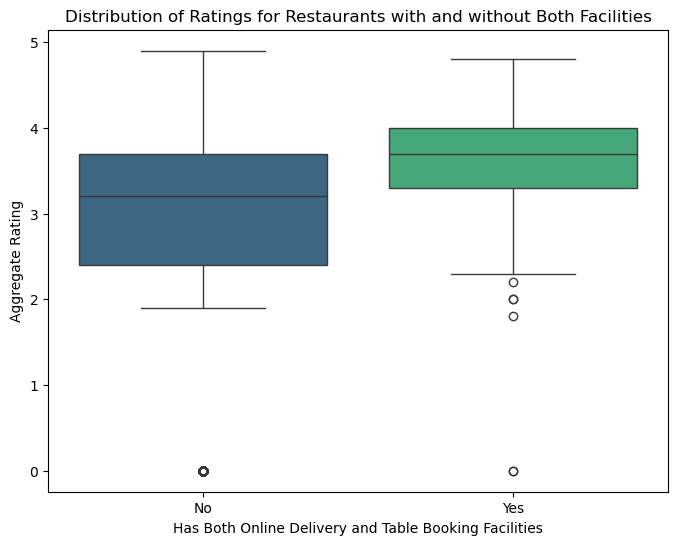

In [44]:
# Create a new column to indicate the presence of both facilities
df['Both Facilities'] = df.apply(lambda x: 'Yes' if x['Has Online delivery'] == 'Yes' and x['Has Table booking'] == 'Yes' else 'No', axis=1)
# Box plot for ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='Both Facilities', y='Aggregate rating', palette='viridis', data=df)
plt.title('Distribution of Ratings for Restaurants with and without Both Facilities')
plt.xlabel('Has Both Online Delivery and Table Booking Facilities')
plt.ylabel('Aggregate Rating')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


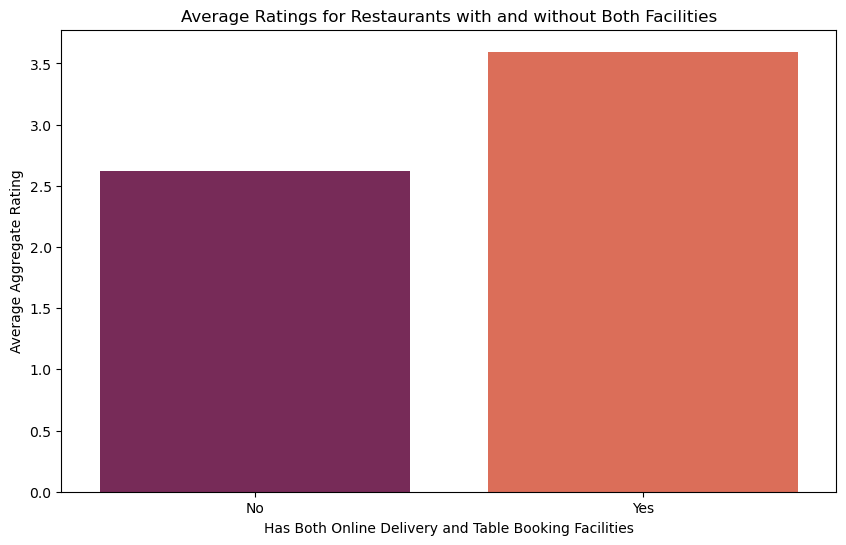

In [45]:
# Calculate average ratings for each group
average_ratings = df.groupby('Both Facilities')['Aggregate rating'].mean().reset_index()

# Bar plot for average ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='Both Facilities', y='Aggregate rating', hue='Both Facilities', palette='rocket', data=average_ratings, dodge=False)
plt.title('Average Ratings for Restaurants with and without Both Facilities')
plt.xlabel('Has Both Online Delivery and Table Booking Facilities')
plt.ylabel('Average Aggregate Rating')
plt.legend().set_visible(False)  # Hide the legend as it's not necessary in this case
plt.show()

In [36]:
#b.	Restaurants where people can enjoy more by engaging in different social activities are rated more positively.
# Filter restaurants that have table booking facilities
restaurants_with_social_activities = df[df['Has Table booking'] == 'Yes']
# Filter restaurants that do not have table booking facilities
restaurants_without_social_activities = df[df['Has Table booking'] == 'No']
# Calculate the average rating for both groups
avg_rating_with_social = restaurants_with_social_activities['Aggregate rating'].mean()
avg_rating_without_social = restaurants_without_social_activities['Aggregate rating'].mean()
print(f"Average rating with social activities: {avg_rating_with_social}")
print(f"Average rating without social activities: {avg_rating_without_social}")

Average rating with social activities: 3.4419689119170984
Average rating without social activities: 2.559358989634219


C:\Users\Jacqueline Mary\AppData\Local\Temp\ipykernel_3468\2035730918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Table booking', y='Aggregate rating', palette='viridis', data=df)


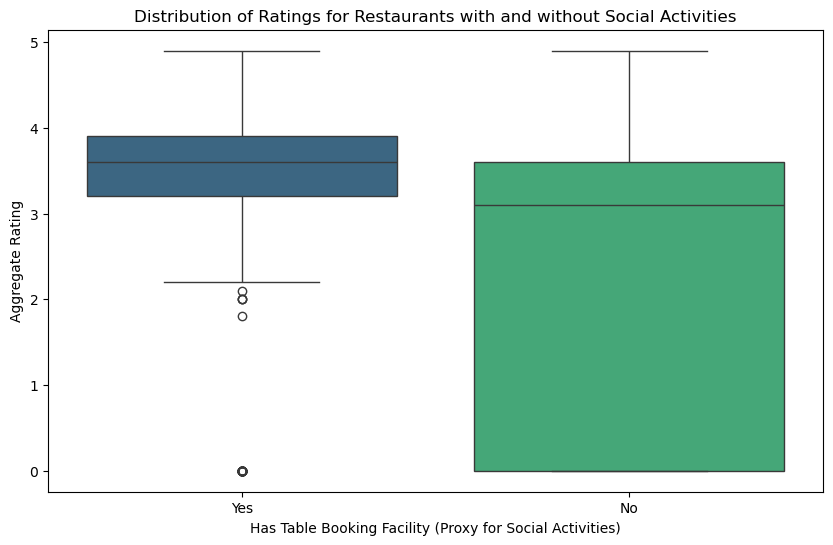

In [42]:
# Box plot for ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', palette='viridis', data=df)
plt.title('Distribution of Ratings for Restaurants with and without Social Activities')
plt.xlabel('Has Table Booking Facility (Proxy for Social Activities)')
plt.ylabel('Aggregate Rating')
plt.show()

C:\Users\Jacqueline Mary\AppData\Local\Temp\ipykernel_3468\3619325081.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Has Table booking', y='Aggregate rating', palette='rocket', data=average_ratings_social)


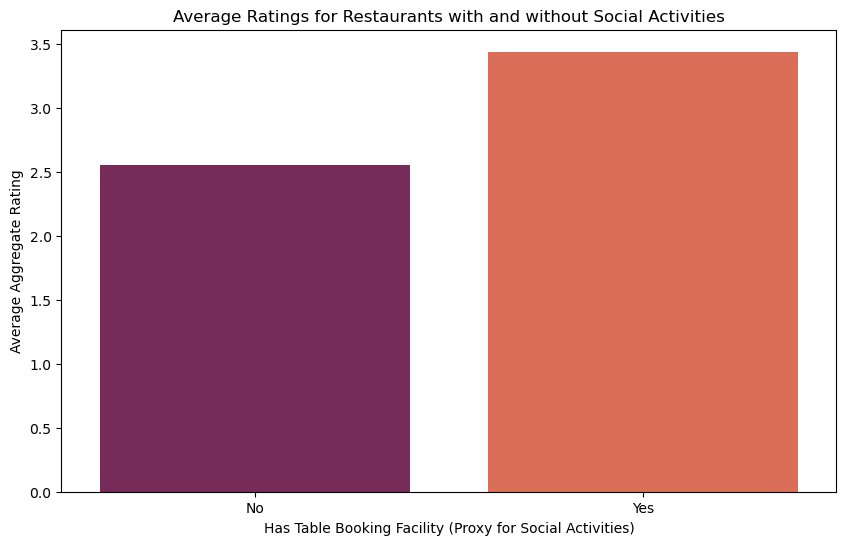

In [41]:
# Calculate average ratings for each group
average_ratings_social = df.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()

# Bar plot for average ratings
plt.figure(figsize=(10, 6))
sns.barplot(x='Has Table booking', y='Aggregate rating', palette='rocket', data=average_ratings_social)
plt.title('Average Ratings for Restaurants with and without Social Activities')
plt.xlabel('Has Table Booking Facility (Proxy for Social Activities)')
plt.ylabel('Average Aggregate Rating')
plt.show()

In [ ]:
"""
Average Ratings for Facilities:

Restaurants with table booking facilities have a higher average rating compared to those without.
Similarly, restaurants with online delivery facilities also tend to have higher average ratings.
Restaurant Categories and Costs:

Certain cuisines, such as those associated with fine dining or specialty foods, tend to be more expensive. On the other hand, more common or fast-food cuisines are relatively cheaper.
Location and Votes:

Locations with more restaurants generally receive more votes, indicating a higher level of engagement from customers. However, the number of votes per restaurant can vary significantly across locations.
High-Rating Cuisines:

Certain cuisines consistently receive higher ratings, suggesting that they are generally well-received by customers. This could be due to the quality of food, the uniqueness of the cuisine, or the overall dining experience.
Impact of Social Activities:

Restaurants with facilities that support social activities, such as table bookings, tend to receive higher ratings. This suggests that customers value the ability to engage in social activities while dining.
Average Cost by Location and Cuisine:

The average cost of dining can vary significantly depending on the location and the type of cuisine. Some locations might have a higher cost due to factors like real estate prices, demand, and the overall cost of living in the area.
Positive Correlation between Facilities and Ratings:

The presence of both online order and table booking facilities is positively correlated with higher restaurant ratings. This indicates that restaurants offering these conveniences are generally preferred by customers and are rated higher.
Summary of Hypothesis Testing:
Hypothesis 1: Restaurants with Online Order and Table Booking Perform Better:

The average rating for restaurants with both facilities is higher than for those without. Statistical testing (t-test) can confirm if this difference is significant.
Hypothesis 2: Restaurants with Social Activities are Rated More Positively:

The average rating for restaurants with table booking facilities (a proxy for social activities) is higher, suggesting a positive customer response to the availability of social activities.
Additional Insights:
Customer Engagement:

The number of votes and ratings can serve as a proxy for customer engagement and satisfaction. Locations and categories with higher engagement may indicate popular dining spots.
Strategic Expansion:

For businesses like Zomato looking to expand or partner with restaurants, focusing on locations and categories with higher ratings and customer engagement can be beneficial.
These conclusions provide actionable insights for restaurant owners, food delivery platforms, and potential investors in the food and hospitality industry.
"""